# Twitter Analysis with automatic pdf report and email

## 1) Authication for twitter API 
   1. Twitter API goes here (Comment Name: Set Connecion)
 
## 2) Filtering Data from Twitter
   1. If want to analyse more data **add column names here**
   
## 3) Analysis Starts here
   1. If want to analyse more data also **add column names here**
   2. To add more stopwords for frequent words of tweets go to ***Add Stopwords here***
   
## 4)List of Mutual Funds
   1. If want to analyse more mutual funds go to  **add more mutual funds here**  

## 5)The Final DF with analysis of all MFs

   1. To alter Final DF got here **Clustering Tweets of All MF in one Dataframe**
   
## 6)PDF Generation
   1. Go to cell with heading **PDF Creation*** all intructions are there

## 6)Sending Email 
   1. Here you will see a comment ***ADD Email of Sender here*** kindly add you credentials here
   2. Add the recipients list under comment **subject and recipients**
   3. To add a file/images there are comments for all in the cell
   


## 1) Authication for twitter API 

In [1]:
# 1. Import Libraries

import pandas as pd
import numpy as np

import tweepy
from tweepy import OAuthHandler

import re
import string
import nltk

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


# 2.Set Connecion

#Get from developers.twitter.com/App->Setting->keys&tokens
#Just assign the credentials

consumer_key = "Twitter Api keys goes here"
consumer_secret = "Twitter Api keys goes here"
access_token = "Twitter Api keys goes here"
access_token_secret = "Twitter Api keys goes here"



# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)



[nltk_data] Downloading package punkt to /home/azureuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Filtering Data from Twitter 

In [2]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


## Analysis Starts here

In [3]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc


def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        print(i, end='\r')
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass
        

In [4]:
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

#### Add Stopwords here

In [5]:
# STOP_WORDS = stopwords.words()
STOP_WORDS = stopwords.words('english')
add_new =['ji','ushnair','amitgrover2002','arthmitrag','anilghelani','hi','fund','hdfc','us','dsp','dspmf','devang199301','kevalashar','theofficialsbi','one','kalpenparekh','sahilkapoor','manishrathidsp']
add_new_sbi = ['details','hey','sbi','sbimf','sumairaabidi','via','hdfcmf','iciciprumf','mutual','service','iradhikagupta','sir','dm','nileshshah68','please','team','query','number','contact','axis']
add_new.extend(add_new_sbi)
STOP_WORDS.extend(add_new)

import re
import string
import nltk

import pandas as pd

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# removing the emojies
# https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
EMOJI_PATTERN = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


def cleaning(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    text = EMOJI_PATTERN.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text



[nltk_data] Downloading package punkt to /home/azureuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## List of Mutual Funds 
### add more mutual funds here

In [6]:

Topic=["hdfcmf","dspmf","sbimf","iciciprumf","lntmutualfund","kotakmf","axismutualfund"]

# Topic=["hdfcmf","dspmf"]


In [7]:
Real_time_tweets = pd.DataFrame()

## Clustering Tweets of All MF in one Dataframe


In [8]:
# Call the function to extract the data. pass the topic and filename you want the data to be stored in.
length = len(Topic)
for i in range(length):
    get_tweets(Topic[i] , Count=1000)
    df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
    dt = df['Tweet'].apply(cleaning)

    word_count = Counter(" ".join(dt).split()).most_common(10)
    word_frequency = pd.DataFrame(word_count, columns = [f"{Topic[i]}_trend_words", f"{Topic[i]}_Frequency"])
    df_final = pd.DataFrame()

    df_final = df[['Date','Tweet','Sentiment']]
    df_final = df_final.rename(columns={'Date': f"{Topic[i]}_date",'Tweet': f"{Topic[i]}_tweet",'Sentiment': f"{Topic[i]}_sentiment"})
    Real_time_tweets = pd.concat([Real_time_tweets,df_final,word_frequency],axis=1)


In [9]:
# Real_time_tweets.indexes()
list(Real_time_tweets.columns.values)

# l1=['hdfcmf','iciciprumf','mutual','iradhikagupta','sir','dm','nileshshah68','please','team','query','number','contact','axis']

['hdfcmf_date',
 'hdfcmf_tweet',
 'hdfcmf_sentiment',
 'hdfcmf_trend_words',
 'hdfcmf_Frequency',
 'dspmf_date',
 'dspmf_tweet',
 'dspmf_sentiment',
 'dspmf_trend_words',
 'dspmf_Frequency',
 'sbimf_date',
 'sbimf_tweet',
 'sbimf_sentiment',
 'sbimf_trend_words',
 'sbimf_Frequency',
 'iciciprumf_date',
 'iciciprumf_tweet',
 'iciciprumf_sentiment',
 'iciciprumf_trend_words',
 'iciciprumf_Frequency',
 'lntmutualfund_date',
 'lntmutualfund_tweet',
 'lntmutualfund_sentiment',
 'lntmutualfund_trend_words',
 'lntmutualfund_Frequency',
 'kotakmf_date',
 'kotakmf_tweet',
 'kotakmf_sentiment',
 'kotakmf_trend_words',
 'kotakmf_Frequency',
 'axismutualfund_date',
 'axismutualfund_tweet',
 'axismutualfund_sentiment',
 'axismutualfund_trend_words',
 'axismutualfund_Frequency']

## PDF Creation 
3 important things
1) Naming of the pdf and the varibale it is stored **pp = PdfPages('Twitter_Sentiments.pdf')**  
2) To add the image/plots in the pdf use this **pp.savefig(fig)**  
3) To save the pdf and make it readable in the last after adding all plot write **pp.close()** after *pp.close()* you cannot add/remove from the pdf

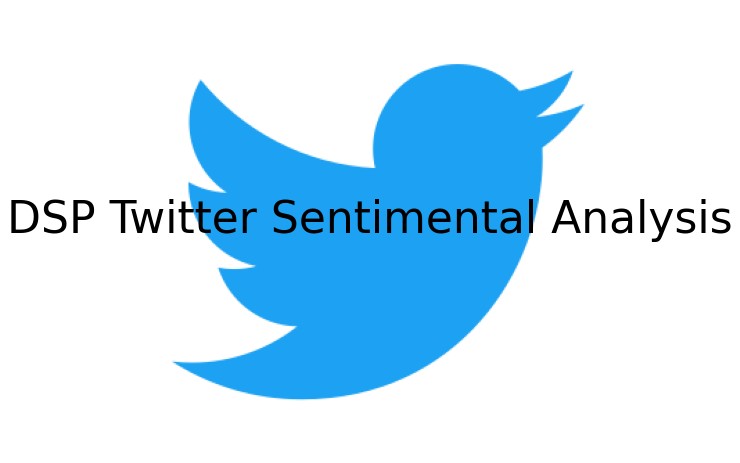

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from urllib.request import urlopen
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data

# create a file-like object from the url


#-----------------Here is the pdf name---------------
pp = PdfPages('Twitter_Sentiments_logo.pdf')
#-----------------Here is the pdf name---------------

firstPage = plt.figure(figsize=(11.69,8.27))
firstPage.clf()
txt = 'DSP Twitter Sentimental Analysis'
firstPage.text(0.5,0.5,txt, transform=firstPage.transFigure, size=44, ha="center")


# create a file-like object from the url
f = urlopen("https://www.creativefreedom.co.uk/wp-content/uploads/2017/06/Twitter-featured.png")

# read the image file
a = plt.imread(f)
plt.imshow(a)
plt.axis('off')

#-----------------This is saves image as the page in pdf ---------------
pp.savefig()
#-----------------This is saves image as the page in pdf ---------------


## Charts are generated here

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


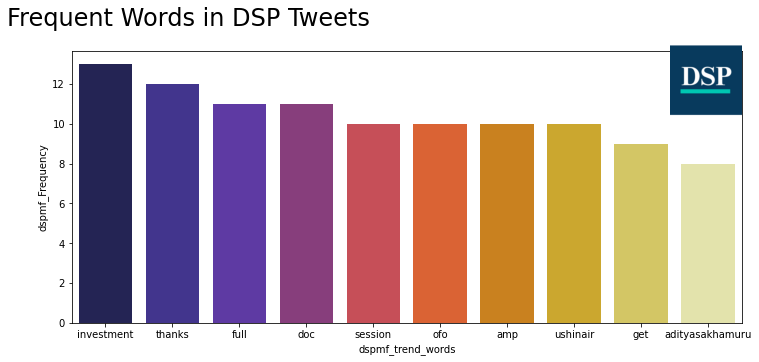

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------Logo added here--------------------------
# # Place the image in the upper-right corner of the figure
# #--------------------------------------------------------
# # We're specifying the position and size in _figure_ coordinates, so the image
# # will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# # image in front of the axes.


# sns.set_style('darkgrid')

x = Real_time_tweets['dspmf_trend_words']
y = Real_time_tweets['dspmf_Frequency']


f = urlopen("https://media-exp1.licdn.com/dms/image/C510BAQHPOTYx95915A/company-logo_200_200/0/1535197527513?e=2159024400&v=beta&t=b_PhiJxQp__lMvxVMraQbt3MizEBIARKV0fExxZk164")

# read the image file
a = plt.imread(f)

fig, ax = plt.subplots(figsize=(12, 5))
newax = fig.add_axes([0.7, 0.7, 0.2, 0.2], anchor='NE', zorder=1)

# ------------------Title of the Page-----------
txt = 'Frequent Words in DSP Tweets'
plt.text(0.05,0.95,txt, transform=fig.transFigure, size=24)
# ------------------Title of the Page-----------
# plt.title("Tweets Common words")


sns.barplot(x, y,palette = "CMRmap",ax=ax)



plt.imshow(a)
plt.axis('off')

# ---------Here we save chart in PDF--------------
pp.savefig(fig)


# ---------Here we save chart as PNG with the name specified--------------
plt.savefig("freq_words.jpg")

plt.show()


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


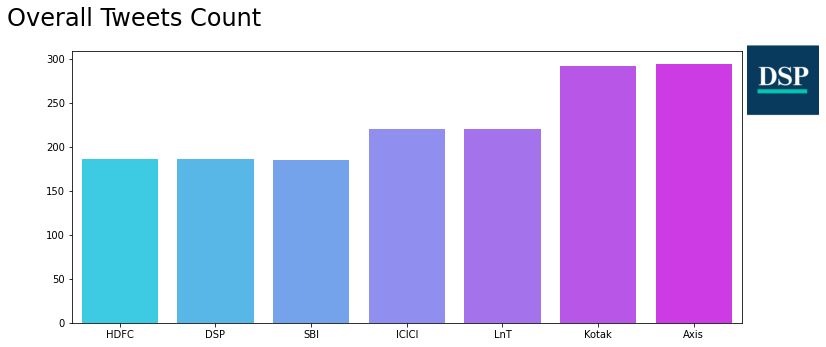

In [12]:
# ------------------------Logo added here--------------------------
# # Place the image in the upper-right corner of the figure
# #--------------------------------------------------------
# # We're specifying the position and size in _figure_ coordinates, so the image
# # will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# # image in front of the axes.


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import get_sample_data


x = ['HDFC', 'DSP', 'SBI', 'ICICI', 'LnT','Kotak','Axis']
y = [len(Real_time_tweets['hdfcmf_tweet'].value_counts()), 
     len(Real_time_tweets['dspmf_tweet'].value_counts()), 
     len(Real_time_tweets['sbimf_tweet'].value_counts()),
     len(Real_time_tweets['iciciprumf_tweet'].value_counts()), 
     len(Real_time_tweets['lntmutualfund_tweet'].value_counts()), 
     len(Real_time_tweets['kotakmf_tweet'].value_counts()),
     len(Real_time_tweets['axismutualfund_tweet'].value_counts())]

# plt.set_size_inches(12, 5)



f = urlopen("https://media-exp1.licdn.com/dms/image/C510BAQHPOTYx95915A/company-logo_200_200/0/1535197527513?e=2159024400&v=beta&t=b_PhiJxQp__lMvxVMraQbt3MizEBIARKV0fExxZk164")

# read the image file
a = plt.imread(f)

fig, ax = plt.subplots(figsize=(12, 5))
newax = fig.add_axes([0.79, 0.7, 0.2, 0.2], anchor='NE', zorder=1)
plt.imshow(a)
newax.axis('off')
plt.axis('off')
# plt.title("Tweets Counts of top MF")

# ------------------Title of the Page-----------

txt = 'Overall Tweets Count'
plt.text(0.05,0.95,txt, transform=fig.transFigure, size=24)


sns.barplot(x, y,palette = "cool",ax=ax)

# ---------Here we save chart in PDF--------------

pp.savefig(fig)
plt.savefig("all_mf_tweet_count.jpg")

plt.show()


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-13-2558cbe782b7>:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.9)


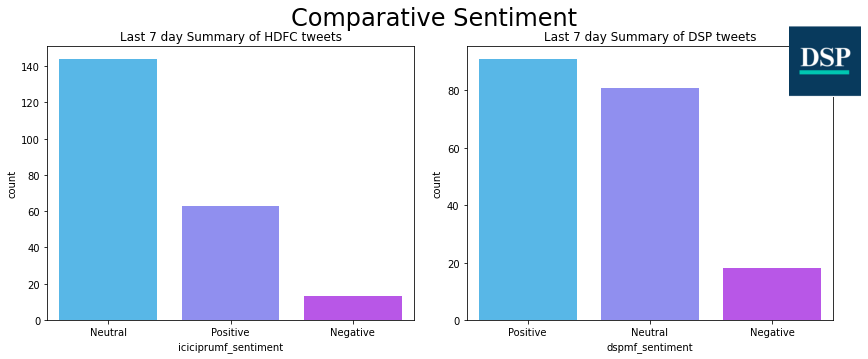

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
# ------------------------Logo added here--------------------------
# # Place the image in the upper-right corner of the figure
# #--------------------------------------------------------
# # We're specifying the position and size in _figure_ coordinates, so the image
# # will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# # image in front of the axes.


f = urlopen("https://media-exp1.licdn.com/dms/image/C510BAQHPOTYx95915A/company-logo_200_200/0/1535197527513?e=2159024400&v=beta&t=b_PhiJxQp__lMvxVMraQbt3MizEBIARKV0fExxZk164")

# read the image file
a = plt.imread(f)

fig, ax =plt.subplots(1,2)
newax = fig.add_axes([0.81, 0.76, 0.2, 0.2], anchor='NE', zorder=1)
plt.imshow(a)
newax.axis('off')
plt.axis('off')
sns.countplot(Real_time_tweets["iciciprumf_sentiment"],palette = "cool", ax=ax[0]).set_title("Last 7 day Summary of HDFC tweets")
sns.countplot(Real_time_tweets["dspmf_sentiment"],palette = "cool", ax=ax[1]).set_title("Last 7 day Summary of DSP tweets")
# fig.show()


fig.set_size_inches(12, 5)
fig.tight_layout(pad=1.9)

# ------------------Title of the Page-----------
txt = 'Comparative Sentiment'
plt.text(0.35,0.96,txt, transform=fig.transFigure, size=24)

# ---------Here we save chart in PDF--------------
pp.savefig(fig)
# ---------Here we save chart in PDF--------------

# Saving the figure.
plt.savefig("bar_count_sent.jpg")


### The last line in the below cell has "pp.close()" after which you cannot add more charts in the pdf, remove that to add more

Text(0.25, 0.95, 'Percentage Sentiment Comparison ')

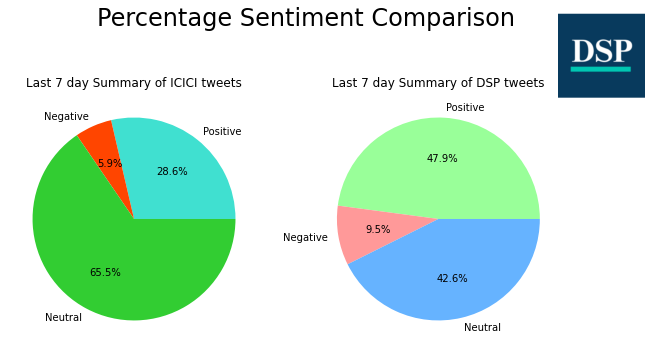

In [14]:

# ------------------------Logo added here--------------------------
# # Place the image in the upper-right corner of the figure
# #--------------------------------------------------------
# # We're specifying the position and size in _figure_ coordinates, so the image
# # will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# # image in front of the axes.


f = urlopen("https://media-exp1.licdn.com/dms/image/C510BAQHPOTYx95915A/company-logo_200_200/0/1535197527513?e=2159024400&v=beta&t=b_PhiJxQp__lMvxVMraQbt3MizEBIARKV0fExxZk164")

# read the image file
a = plt.imread(f)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6)) #ax1,ax2 refer to your two pies

newax = fig.add_axes([0.81, 0.78, 0.2, 0.2], anchor='NE', zorder=1)
plt.imshow(a)
newax.axis('off')
plt.axis('off')
# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels=["Positive","Negative","Neutral"]
a=len(Real_time_tweets[Real_time_tweets["iciciprumf_sentiment"]=="Positive"])
b=len(Real_time_tweets[Real_time_tweets["iciciprumf_sentiment"]=="Negative"])
c=len(Real_time_tweets[Real_time_tweets["iciciprumf_sentiment"]=="Neutral"])
colors = ['turquoise', 'orangered', 'limegreen']

d=np.array([a,b,c])

ax1.pie(d,labels = labels,colors = colors,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Last 7 day Summary of ICICI tweets')



labels=["Positive","Negative","Neutral"]
a=len(Real_time_tweets[Real_time_tweets["dspmf_sentiment"]=="Positive"])
b=len(Real_time_tweets[Real_time_tweets["dspmf_sentiment"]=="Negative"])
c=len(Real_time_tweets[Real_time_tweets["dspmf_sentiment"]=="Neutral"])

# colors = ['turquoise', 'orangered', 'limegreen']
colors = ['#99ff99','#ff9999','#66b3ff']
d=np.array([a,b,c])
# ax2.title("Last 7 day Summary of DSP tweets")
ax2.pie(d,labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Last 7 day Summary of DSP tweets')



# ------------------Title of the Page-----------
txt = 'Percentage Sentiment Comparison '
plt.text(0.25,0.95,txt, transform=fig.transFigure, size=24)


# plt.savefig("Pie_sent.jpg")
# ---------Here we save chart in PDF--------------
# pp.savefig(fig)
# pp.close()


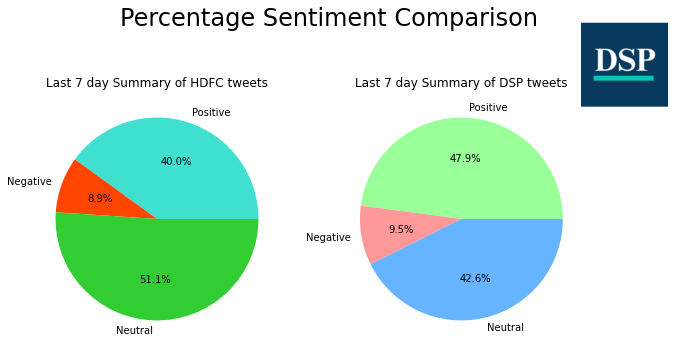

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------Logo added here--------------------------
# # Place the image in the upper-right corner of the figure
# #--------------------------------------------------------
# # We're specifying the position and size in _figure_ coordinates, so the image
# # will shrink/grow as the figure is resized. Remove "zorder=-1" to place the
# # image in front of the axes.

f = urlopen("https://media-exp1.licdn.com/dms/image/C510BAQHPOTYx95915A/company-logo_200_200/0/1535197527513?e=2159024400&v=beta&t=b_PhiJxQp__lMvxVMraQbt3MizEBIARKV0fExxZk164")

# read the image file
a = plt.imread(f)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6)) #ax1,ax2 refer to your two pies

newax = fig.add_axes([0.81, 0.76, 0.2, 0.2], anchor='NE', zorder=1)
plt.imshow(a)
newax.axis('off')
plt.axis('off')

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels=["Positive","Negative","Neutral"]
a=len(Real_time_tweets[Real_time_tweets["hdfcmf_sentiment"]=="Positive"])
b=len(Real_time_tweets[Real_time_tweets["hdfcmf_sentiment"]=="Negative"])
c=len(Real_time_tweets[Real_time_tweets["hdfcmf_sentiment"]=="Neutral"])
colors = ['turquoise', 'orangered', 'limegreen']

d=np.array([a,b,c])

ax1.pie(d,labels = labels,colors = colors,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Last 7 day Summary of HDFC tweets')



labels=["Positive","Negative","Neutral"]
a=len(Real_time_tweets[Real_time_tweets["dspmf_sentiment"]=="Positive"])
b=len(Real_time_tweets[Real_time_tweets["dspmf_sentiment"]=="Negative"])
c=len(Real_time_tweets[Real_time_tweets["dspmf_sentiment"]=="Neutral"])

# colors = ['turquoise', 'orangered', 'limegreen']
colors = ['#99ff99','#ff9999','#66b3ff']
d=np.array([a,b,c])
# ax2.title("Last 7 day Summary of DSP tweets")
ax2.pie(d,labels = labels,colors = colors,autopct = '%1.1f%%') #plot second pie
ax2.set_title('Last 7 day Summary of DSP tweets')

# ------------------Title of the Page-----------
txt = 'Percentage Sentiment Comparison '
plt.text(0.25,0.95,txt, transform=fig.transFigure, size=24)


plt.savefig("Pie_sent.jpg")

# ---------Here we save chart in PDF--------------
pp.savefig(fig)
pp.close()


In [16]:
# a=len(Real_time_tweets[Real_time_tweets["hdfcmf_sentiment"]=="Positive"])
# b=len(Real_time_tweets[Real_time_tweets["hdfcmf_sentiment"]=="Negative"])
# c=len(Real_time_tweets[Real_time_tweets["hdfcmf_sentiment"]=="Neutral"])
# colors = ['turquoise', 'deeppink', 'limegreen', 'limegreen', 'limegreen']
# d=np.array([a,b,c])
# plt.pie(d,shadow=True,labels=["Positive","Negative","Neutral"],colors=colors, startangle=90, autopct='%.1f%%');
# plt.title("Last 7 day Summary of DSP tweets")
# plt.savefig("sen_output_pie.jpg")

### Created CSV here

In [17]:
Real_time_tweets.to_csv('Top_10_MF_realTime.csv',index=False)


## Sending Mail


In [19]:
#to query:
import sys
import ast
from datetime import datetime
 
import smtplib
import mimetypes
from email.mime.multipart import MIMEMultipart
from email import encoders
from email.message import Message
from email.mime.audio import MIMEAudio
from email.mime.base import MIMEBase
from email.mime.image import MIMEImage
from email.mime.text import MIMEText
 
 
 # ---------------------- ADD Email of Sender here-----------------
class Bimail:
	def __init__(self,subject,recipients):
		self.subject = subject
		self.recipients = recipients
		self.htmlbody = ''
		self.sender = "email"
		self.senderpass = 'password'
		self.attachments = []
 
	def send(self):
		msg = MIMEMultipart('alternative')
		msg['From']=self.sender
		msg['Subject']=self.subject
		msg['To'] = ", ".join(self.recipients) # to must be array of the form ['mailsender135@gmail.com']
		msg.preamble = "preamble goes here"
		#check if there are attachments if yes, add them
		if self.attachments:
			self.attach(msg)
		#add html body after attachments
		msg.attach(MIMEText(self.htmlbody, 'html'))
		#send
		s = smtplib.SMTP('smtp.gmail.com:587')
		s.starttls()
		s.login(self.sender,self.senderpass)
		s.sendmail(self.sender, self.recipients, msg.as_string())
		#test
		print (msg)
		s.quit()
	
	def htmladd(self, html):
		self.htmlbody = self.htmlbody+'<p></p>'+html
 
	def attach(self,msg):
		for f in self.attachments:
		
			ctype, encoding = mimetypes.guess_type(f)
			if ctype is None or encoding is not None:
				ctype = "application/octet-stream"
				
			maintype, subtype = ctype.split("/", 1)
 

			if maintype == "text":
				fp = open(f)
				# Note: we should handle calculating the charset
				attachment = MIMEText(fp.read(), _subtype=subtype)
				fp.close()
			elif maintype == "image":
				fp = open(f, "rb")
				attachment = MIMEImage(fp.read(), _subtype=subtype)
				fp.close()
			elif maintype == "audio":
				fp = open(f, "rb")
				attachment = MIMEAudio(fp.read(), _subtype=subtype)
				fp.close()
			else:
				fp = open(f, "rb")
				attachment = MIMEBase(maintype, subtype)
				attachment.set_payload(fp.read())
				fp.close()
				encoders.encode_base64(attachment)
			attachment.add_header("Content-Disposition", "attachment", filename=f)
			attachment.add_header('Content-ID', '<{}>'.format(f))
			msg.attach(attachment)
	
	def addattach(self, files):
		self.attachments = self.attachments + files
 

 #example below
if __name__ == '__main__':	
    
	#--------------- subject and recipients-------------------
    
	mymail = Bimail('Tweets Sentiments of ' +datetime.now().strftime('%Y/%m/%d'), ['om','om','jm'])
	#start html body. Here we add a greeting. 
	mymail.htmladd('Happy Greetings from Jagrit, find the weekly DSP Twitter summary below, this is auto generated mail.')
	#Further things added to body are separated by a paragraph, so you do not need to worry about newlines for new sentences
	#here we add a line of text and an html table previously stored in the variable
# 	mymail.htmladd('Daily sales')
# 	mymail.htmladd(htmlsalestable)
	#another table name + table
# 	mymail.htmladd('Daily bestsellers')
# 	mymail.htmladd(htmlbestsellertable)
    
	mymail.htmladd('Last 7 days comparitive Sentiment')
	#attach image chart
	mymail.addattach(['Pie_sent.jpg'])
    
	#refer to image chart in html
	mymail.htmladd('<img src="cid:Pie_sent.jpg"/>') 
    
    

    	#refer to image chart in html
	mymail.htmladd('Past 7 days Sentiment Count')
	mymail.htmladd('<img src="cid:bar_count_sent.jpg"/>') 

	#attach image chart
	mymail.addattach(['bar_count_sent.jpg'])
    
	mymail.htmladd('Overall Tweet count of top MF')

	#refer to image chart in html
	mymail.htmladd('<img src="cid:all_mf_tweet_count.jpg"/>') 
# 	mymail.htmladd('All MF tweets count')
	#attach image chart
	mymail.addattach(['all_mf_tweet_count.jpg'])

	mymail.htmladd('Frequent words in DSP Tweet')
    
	#refer to image chart in html
	mymail.htmladd('<img src="cid:freq_words.jpg"/>') 

	#attach image chart
	mymail.addattach(['freq_words.jpg'])
    
	#attach another file
#     mymail.addattach(['Top_10_MF_realTime.csv'])
	mymail.htmladd('Top Mutual Funds tweets attachted in excel')
	mymail.addattach(['Top_10_MF_realTime.csv'])
	mymail.htmladd('Sentiment PDF')
	mymail.addattach(['Twitter_Sentiments_logo.pdf'])
# 	#send!
	mymail.send()

Content-Type: multipart/alternative; boundary="===============5705164486958876953=="
MIME-Version: 1.0
From: jagritacharya2019@gmail.com
Subject: Tweets Sentiments of 2021/07/29
To: jagritacharya2020@gmail.com, jagrit.acharya@dspim.com, jagritach@hotmail.com

preamble goes here
--===============5705164486958876953==
Content-Type: image/jpeg
MIME-Version: 1.0
Content-Transfer-Encoding: base64
Content-Disposition: attachment; filename="Pie_sent.jpg"
Content-ID: <Pie_sent.jpg>

/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYF
BgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoK
CgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAGwAtADASIA
AhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQA
AAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3
ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm
p6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8v